In [1]:
import os,sys,string, time
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
from importlib import reload

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
import Utilities.Functions as Functions
import Utilities.Sys_unc_variables as Sys_unc
import Utilities.Variables_bins as Variables_bins
from Utilities.ipython_exit import exit

print ('Success')

Success


# Reading in .pkl files

In [6]:
Params = {"Run":"run1", #The run number, so far either "run1" or "run3"
          "Load_single_file":False, #This will override everything else, put the desired file in the "single_file" line
          "single_file":"overlay",
          "Load_standard_bkgs":True,
          "Load_DetVars":False,
          "Only_keep_common_DetVar_evs":True,
          "Load_Signal_DetVars":False,
          "Load_pi0_signal_DetVars":False,
          "Load_data":True,
          "FLATTEN":True, #Have one row per reconstructed object in the analysis dataframe
          "only_presel":False, #Create small files containing only variables necessary for pre-selection, for making pre-selection plots
          "Load_truth_vars":False,
          "Load_lepton_signal":True,
          "Load_lepton_dirac":False,
          "Load_pi0_signal":False,
          "Load_pi0_dirac":False}

# Params, samples = Functions.create_sample_list(Params)
Params, samples = Functions.new_create_sample_list(Params)
loc_pkls = "pkl_files/"+Params["Run"]+"/current_files/"+Params["variables_string"]+"/"
# end_string = "_FINAL"
end_string = "_Finished"

Loading these run1 samples: 
['overlay', 'dirtoverlay', 'beamoff', 'beamgood', '2_ee', '10_ee', '20_ee', '50_ee', '100_ee', '150_ee']


In [7]:
def Load_preselected_pkls(samples, Params, loc_pkls, filename):
    """
    For loading in preselected pkl files. 
    """
    sample_test_dict = {}
    sig_names_list = Constants.HNL_ee_samples_names+Constants.HNL_mass_pi0_samples_names+Constants.HNL_ee_dirac_names+Constants.HNL_pi0_dirac_names
    if Params["Load_DetVars"] == True: loc_pkls += "DetVars/"
    elif Params["Load_Signal_DetVars"] == True: loc_pkls += "Signal_DetVars/"
    elif Params['Load_pi0_signal_DetVars'] == True: loc_pkls += "Signal_DetVars/pi0/"
    for sample in samples:
        if Params["Load_pi0_signal"] == True: start_str = loc_pkls + "pi0_selection/Preselected_"
        # elif (sample == "beamoff") and (Params["EXT_in_training"] == True: start_str = loc_pkls + "BDT_Test_dfs/Test_overlay_"
        else: start_str = loc_pkls + "Preselected_"
        # sample_test_dict[sample] = pd.read_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+f"_flattened{filename}.pkl")
        sample_test_dict[sample] = pd.read_pickle(start_str+f"{sample}_"+Params["Run"]+f"_flattened{filename}.pkl")
    
    return sample_test_dict

In [8]:
samples_dict = Load_preselected_pkls(samples, Params, loc_pkls, end_string)

In [9]:
samples_dict.keys()

dict_keys(['overlay', 'dirtoverlay', 'beamoff', 'beamgood', '2_ee', '10_ee', '20_ee', '50_ee', '100_ee', '150_ee'])

In [10]:
# samples_dict = {}
# # end_string = "_FINAL"
# end_string = "_Finished"

# for sample in samples:
#     if sample in Constants.Detector_variations:
#         file = pd.read_pickle(loc_pkls+"DetVars/overlay_"+Params["Run"]+"_"+Params["variables_string"]+f"_{sample}_"+Params["Flat_state"]+"_"+Params["Reduced_state"]+"_final.pkl")
#         samples_dict[sample] = file
#     if Params["Load_Signal_DetVars"] == True:
#         file = pd.read_pickle(loc_pkls+"Signal_DetVars/"+Params["Run"]+f"_{sample}_"+Params["Reduced_state"]+f"{end_string}.pkl")
#         samples_dict[sample] = file
#     else:
#         if sample == 'signal':
#             for HNL_mass in Constants.HNL_mass_samples:
#                 file = pd.read_pickle(loc_pkls+f"Preselected_{HNL_mass}_"+Params["Run"]+"_my_vars_flattened_ultimate.pkl")
#                 # file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#                 samples_dict[HNL_mass] = file
#         elif sample == 'pi0_signal':
#             for HNL_mass in Constants.HNL_mass_pi0_samples:
#                 file = pd.read_pickle(loc_pkls+f"pi0_selection/Preselected_"+Params["Run"]+f"_{HNL_mass}_pi0.pkl")
#                 # file = pd.read_pickle(loc_pkls+f"{sample}_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#                 samples_dict[str(HNL_mass)+"_pi0"] = file
#         elif (Params["Load_single_file"] == True) and (isinstance(sample,int)):
#             HNL_mass = sample
#             file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
#             samples_dict[HNL_mass] = file
#         else: 
#             file = pd.read_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+"_my_vars_flattened_ultimate.pkl")
#             # file = pd.read_pickle(loc_pkls+f"{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#             samples_dict[sample] = file

# print(samples_dict.keys())

In [11]:
for sample in samples_dict:
    print(f"{sample} length is " + str(len(samples_dict[sample])))

overlay length is 48299
dirtoverlay length is 7323
beamoff length is 7036
beamgood length is 8398
2_ee length is 14325
10_ee length is 12168
20_ee length is 13438
50_ee length is 12290
100_ee length is 12867
150_ee length is 12528


# Make plotting dictionaries

In [12]:
#Want to have arrows drawn on for where the preselection cut goes
HNL_mass = 100
if Params["Load_pi0_signal"]: HNL_mass = f"{HNL_mass}_pi0" #only plotting one at a time
if Params["Load_lepton_signal"]: HNL_mass = f"{HNL_mass}_ee" #only plotting one at a time

samples_plotting = {"overlay":samples_dict["overlay"],
                    "dirtoverlay":samples_dict["dirtoverlay"],
                    "beamoff":samples_dict["beamoff"],
                    "signal":samples_dict[HNL_mass]}

if Params["Run"] == "run1":
    sample_norms = {"overlay":Constants.SF_overlay_run1,
                    "dirtoverlay":Constants.SF_dirt_run1,
                    "beamoff":Constants.SF_EXT_run1,
                    "signal":Constants.run1_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run1_Sys_unc
elif Params["Run"] == "run3":
    sample_norms = {"overlay":Constants.SF_overlay_run3,
                    "dirtoverlay":Constants.SF_dirt_run3,
                    "beamoff":Constants.SF_EXT_run3,
                    "signal":Constants.run3_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run3_Sys_unc

if Params["Load_data"] == True:
    data_dict = {"beamgood":samples_dict["beamgood"]}
    data_norm = {"beamgood":1.0} #No scaling as this is data, should have scaled MC to this POT.
    samples_plotting.update(data_dict)
    sample_norms.update(data_norm)
    
PT.HNL_scaling_calculator(samples_plotting,sample_norms)


The ratio of overlay to HNL events is 36893066

The ratio of all bkgs to HNL events is 79243605



## Plot data

In [14]:
New_feature_list = ['shrclusdir2', 'n_tracks', 'trk_energy', 'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
                    'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U', 'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
                    'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v', 'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot',
                    'trk_dir_z_v', 'SliceCaloEnergy2']
var_list_save = ['shrclusdir2', 'n_tracks', 'trk_energy',
       'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
       'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U',
       'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
       'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v',
       'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot', 'trk_dir_z_v',
       'SliceCaloEnergy2', 'trk_score', 'shr_energy_tot', 'trk_energy_tot', 'n_showers']
count = 0

print(Variables.other_potential_vars)

['shr_tkfit_dedx_U', 'shr_tkfit_dedx_V', 'shr_tkfit_dedx_Y', 'shr_tkfit_dedx_max', 'shr_tkfit_2cm_dedx_Y', 'shr_chipr', 'trk_bragg_p', 'trk_bragg_p_v', 'trk_chipr', 'subcluster', 'shr_moliere_avg_v', 'shrmoliereavg']


In [44]:
#Calculate sys
# variable = var_list_save[count]
# count+=1

Calculate_sys = False
variable = 'shr_tkfit_dedx_max'


print("\'"+variable+"\'")

reload(PT)
reload(Functions)
reload(Constants)
reload(Sys_unc)
reload(Variables_bins)

if Params["Run"] == "run1": flat_sys_vars_dict = Sys_unc.run1_Sys_unc
if Params["Run"] == "run3": flat_sys_vars_dict = Sys_unc.run3_Sys_unc

print("Maximum value in overlay is " + str(max(samples_plotting["overlay"][variable].to_numpy())))    
print("Maximum value in signal is " + str(max(samples_plotting["signal"][variable].to_numpy()))) 
print("Manimum value in signal is " + str(min(samples_plotting["signal"][variable].to_numpy()))) 
samples_plotting.keys()

'shr_tkfit_dedx_max'
Maximum value in overlay is 51.0434
Maximum value in signal is 38.800404
Manimum value in signal is -9999.0


dict_keys(['overlay', 'dirtoverlay', 'beamoff', 'signal', 'beamgood'])

Plotting shrmoliereavg for run1
[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5 25.  27.5 30.  32.5
 35.  37.5 40.  42.5 45.  47.5 50. ]
[0.0, 50.0]


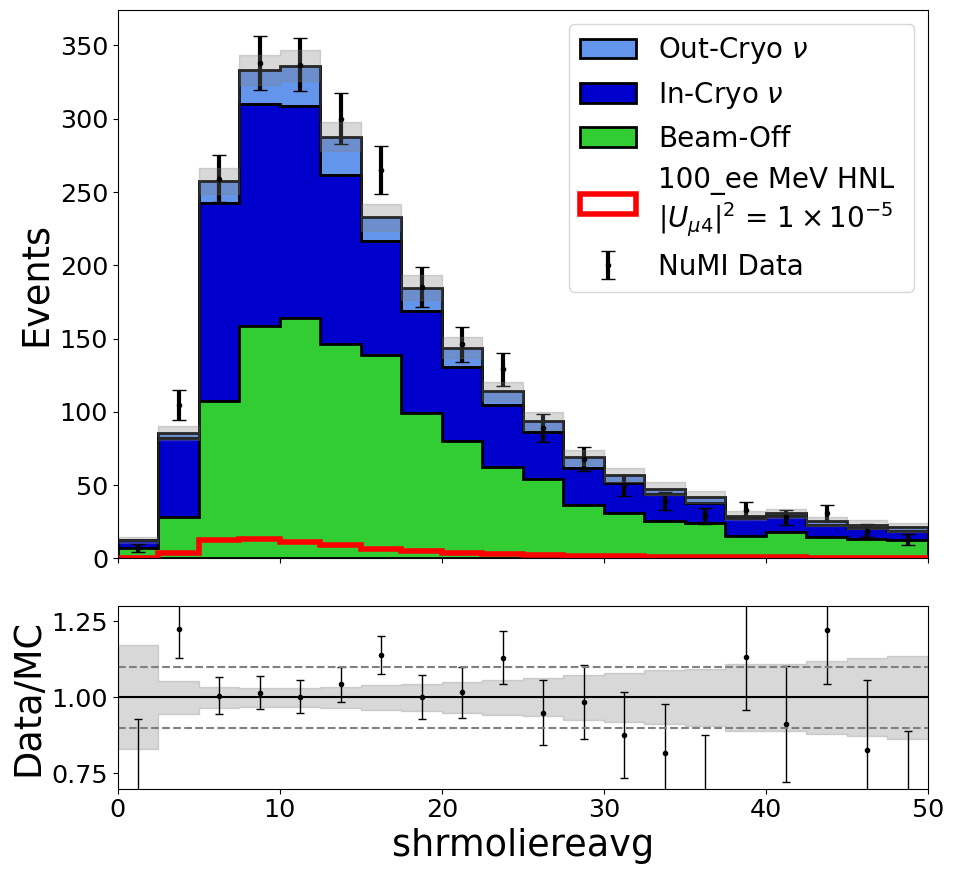

In [43]:
savefig = False

print(f"Plotting {variable} for " + Params["Run"])

if variable in Constants.variable_names_dict: xlabel = Constants.variable_names_dict[variable]
else: xlabel = variable

if variable in Variables_bins.BDT_vars_bins: bins = Variables_bins.BDT_vars_bins[variable]
else: bins = np.linspace(0, 50, 21)
xlims = [bins[0],bins[-1]]
print(bins)
print(xlims)

PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel=xlabel, xlims=xlims, bins=bins, HNL_mass=HNL_mass,
                                   HNLplotscale=1000000,cutline=0.0,legloc="best", show_ev_nums=False, CalcSys=Calculate_sys, xticks = [], 
                                   sys_dict=flat_sys_vars_dict, centre_bins=False, hatch=False, ylimit=None, legsize=20, logy=False,
                                   HNL_scale_label=True)

# if variable == "n_pfps":plt.xlim([0.5, 8.5])

# plt.axvline(x=16.5, lw=3, color='green', linestyle = 'dashed')
Name = "Labelled_"
if Params["Load_pi0_signal"] == True: Name = "pi0/"
if Calculate_sys==True: Sys_name = "with_sys"
if Calculate_sys==False: Sys_name = "no_sys"

if savefig == True:
    plt.savefig(f"plots/Data_MC_comparison/BDT_input_variables/{Name}{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.png")
    plt.savefig(f"plots/Data_MC_comparison/BDT_input_variables/{Name}{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.pdf")

## Make all BDT input plots (broken? don't know why)

In [ ]:
np.seterr(divide='ignore', invalid='ignore') # to stop annoying output about dividing by zeros or Nans
vars_to_plot = ['shrclusdir2', 'n_tracks', 'trk_energy', 'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
                'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U', 'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
                'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v', 'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot',
                'trk_dir_z_v', 'SliceCaloEnergy2', 'trk_energy_tot', 'shr_energy_tot', 'trk_calo_energy_u_v', 'trk_score_v', 'n_showers']

Calculate_sys = True
Name = ""
if Params["Load_pi0_signal"] == True: Name = "pi0/"
loc = f"plots/Data_MC_comparison/BDT_input_variables/"
if Calculate_sys==True: Sys_name = "with_sys"
#Need to add in savefig and savename in argument of plotting function, also make name better.
for var in vars_to_plot:
    print(var)
    savename = f"{Name}{var}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}"
    xlabel = Constants.variable_names_dict[var]
    full_bins = Variables_bins.bins_var[var]
    bins = len(full_bins)-1
    xlims = [full_bins[0],full_bins[-1]]
    print(full_bins)
    PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel=xlabel, xlims=xlims, bins=bins, HNL_mass=HNL_mass,
                                       HNLplotscale=2000000,cutline=0.0,legloc="best", show_ev_nums=False, CalcSys=Calculate_sys, xticks = [], 
                                       sys_dict=flat_sys_vars_dict, centre_bins=False, hatch=False, ylimit=None, legsize=22, logy=False, display=False,
                                       savefig=False, savename=loc+savename)
    

## Plotting just signal

In [ ]:
plt.figure(figsize=[10,10])

for HNL_mass in Constants.HNL_mass_samples:
    plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[HNL_mass],label=f"{HNL_mass} MeV HNL",lw=4,markersize=15)
    
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict[effic])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
# plt.yscale("log")
plt.legend()

plt.savefig("plots/Preselection_efficiencies/Signal_only_"+Params["Run"]+"_"+Params["Flat_state"]+".png")

# End of code